In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
customer = pd.read_csv('Telecom_customer_churn.csv')
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
customer.shape

(7043, 21)

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#From the information of the dataset 'Totalcharges' is has continuoes data 
customer['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
customer.loc[customer['TotalCharges']== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
customer['TotalCharges'] = customer['TotalCharges'].replace(" ",np.nan)

In [11]:
customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
customer['TotalCharges'] = customer['TotalCharges'].astype(float)

In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
customer['TotalCharges'] = customer['TotalCharges'].fillna(np.mean(customer['TotalCharges']))

In [15]:
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
customer.drop('customerID',axis=1,inplace=True)

In [17]:
customer.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [18]:
#For visualization perpose we will separate categorical columns
categori = customer[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService'
                    ,'OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling'
                    ,'PaymentMethod','Churn']].copy()

In [19]:
categori.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# Visualization

In [20]:
#gender values counts
categori['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

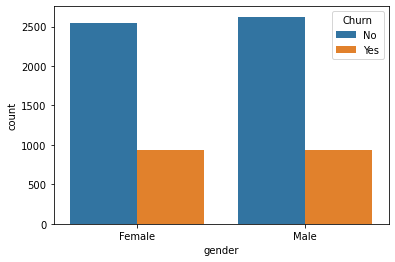

In [21]:
#gender
sns.countplot(x='gender',data=categori,hue='Churn')

In [22]:
#Partner
categori['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

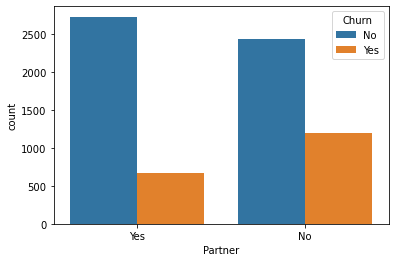

In [23]:
#Partner
sns.countplot(x='Partner',data=categori,hue='Churn')

In [24]:
# 'Dependents'
categori['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

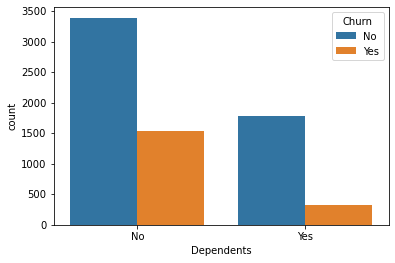

In [25]:
sns.countplot(x='Dependents',data=categori,hue = 'Churn')

In [26]:
#'PhoneService'
categori['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

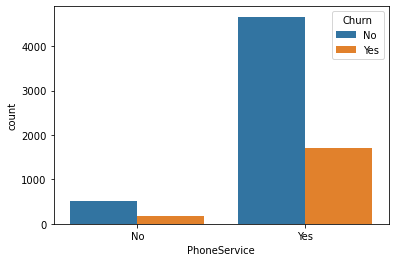

In [27]:
sns.countplot(x='PhoneService',data=categori,hue='Churn')

In [28]:
# 'MultipleLines'
categori['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

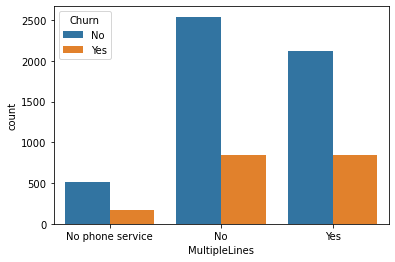

In [29]:
sns.countplot(x='MultipleLines',data=categori,hue='Churn')

In [30]:
# 'InternetService'
categori['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

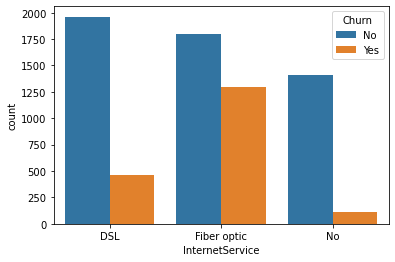

In [31]:
sns.countplot(x='InternetService',data=categori,hue='Churn')

In [32]:
#'OnlineSecurity'
categori['OnlineSecurity'].value_counts()


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

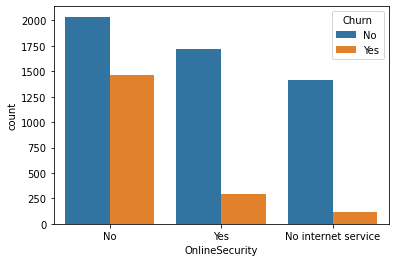

In [33]:
sns.countplot(x='OnlineSecurity',data=categori,hue='Churn')

In [34]:
#'DeviceProtection'
categori['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

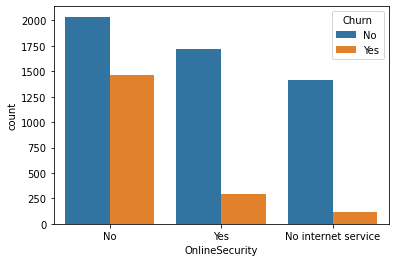

In [35]:
sns.countplot(x='OnlineSecurity',data=categori,hue='Churn')

In [36]:
#'TechSupport'
categori['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

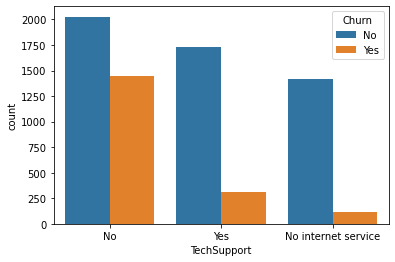

In [37]:
sns.countplot(x='TechSupport',data=categori,hue='Churn')

In [38]:
# 'StreamingTV',
categori['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

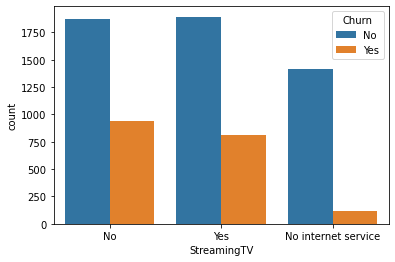

In [39]:
sns.countplot(x='StreamingTV',data=categori,hue='Churn')

In [40]:
# 'StreamingMovies'
categori['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

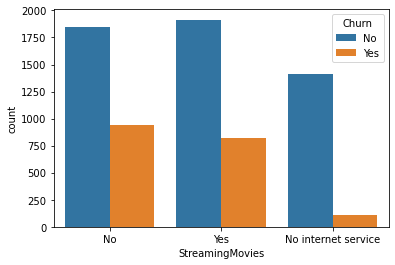

In [41]:
sns.countplot(x='StreamingMovies',data=categori,hue='Churn')

In [42]:
# 'Contract'
categori['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

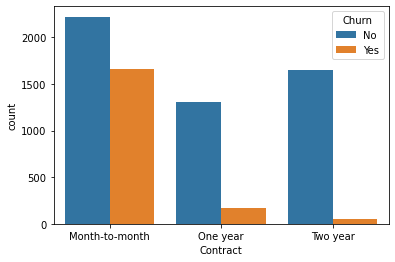

In [43]:
sns.countplot(x='Contract',data=categori,hue='Churn')

In [44]:
# 'PaperlessBilling'
categori['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

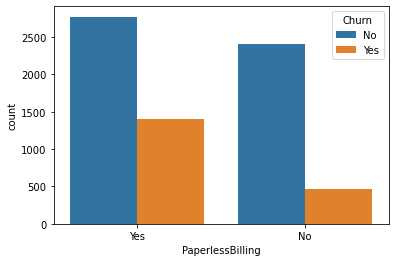

In [45]:
sns.countplot(x='PaperlessBilling',data=categori,hue='Churn')

In [46]:
# 'PaymentMethod'
categori['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

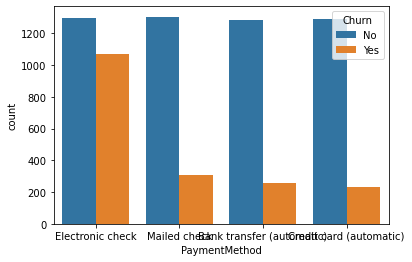

In [47]:
sns.countplot(x='PaymentMethod',data=categori,hue='Churn')

In [48]:
#Seniorcitizen
categori['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

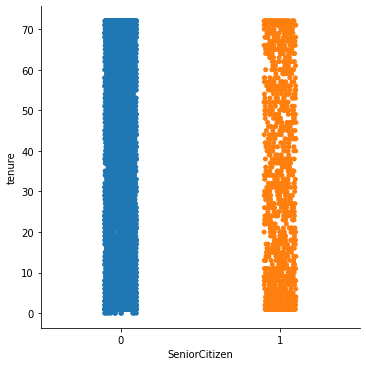

In [49]:
sns.catplot(x='SeniorCitizen',y='tenure',data=customer)

In [51]:
continues = customer[['MonthlyCharges','TotalCharges']].copy()

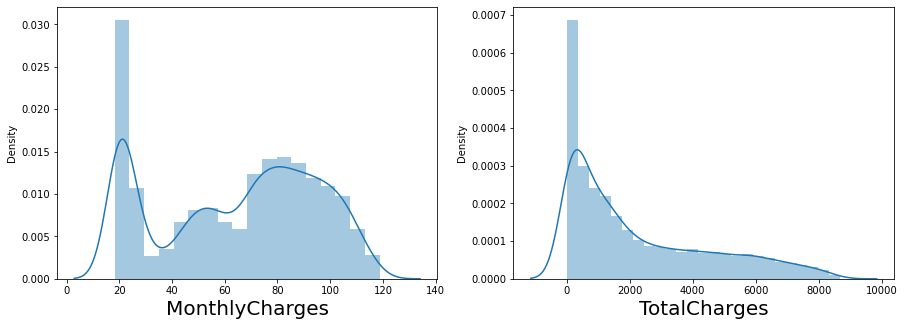

In [52]:
#sns.displot(continues['TotalCharges'],kde='True')
plt.figure(figsize = (15,5))
plotnumber = 1

for column in continues:
    if plotnumber <=2:
        ax =  plt.subplot(1,2,plotnumber)
        sns.distplot(continues[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

In [63]:
continues.skew()

MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [64]:
from sklearn.preprocessing import power_transform

continues_new = power_transform(continues)

continues=pd.DataFrame(continues_new,columns=continues.columns)
continues

,MonthlyCharges,TotalCharges
0,-1.158541,-1.810588
1,-0.239492,0.253313
2,-0.342665,-1.387269
3,-0.731079,0.232253
4,0.213545,-1.250118
...,...,...
7038,0.671510,0.295688
7039,1.260981,1.567097
7040,-1.167241,-0.859899
7041,0.334312,-0.922968


In [65]:
continues.skew()

MonthlyCharges   -0.259035
TotalCharges     -0.144899
dtype: float64

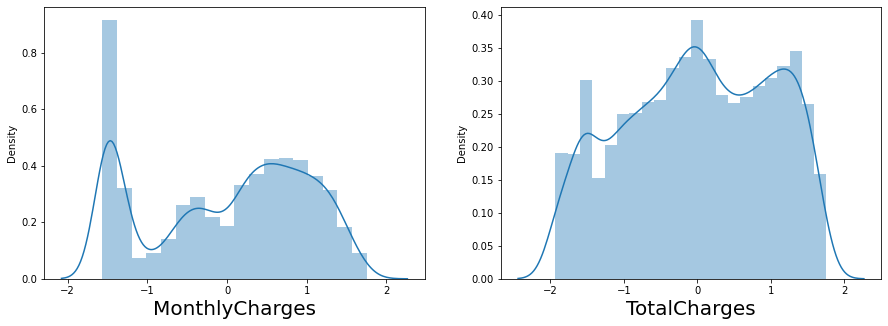

In [66]:
# Check for skew is reduced r not
plt.figure(figsize = (15,5))
plotnumber = 1

for column in continues:
    if plotnumber <=2:
        ax =  plt.subplot(1,2,plotnumber)
        sns.distplot(continues[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

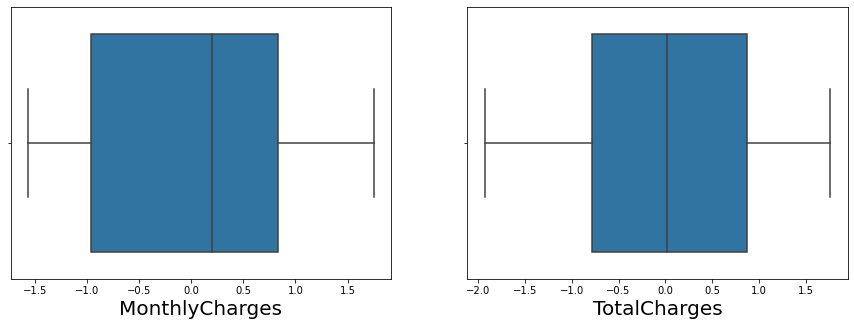

In [67]:
#check for outliers
plt.figure(figsize = (15,5))
plotnumber = 1

for column in continues:
    if plotnumber <=2:
        ax =  plt.subplot(1,2,plotnumber)
        sns.boxplot(continues[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

##### I didn't found any ouliers here.So,im proceeding to next

#### Our dataset has alot of string values.So,we will encode the data 

In [54]:
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
customer['Churn'].replace(to_replace='Yes', value=1, inplace=True)
customer['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [58]:
customer['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [59]:
#Data Preprocessing
from sklearn.preprocessing import OneHotEncoder
customer_dum=pd.get_dummies(customer,drop_first=True)
customer_dum

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


### DataEncoding

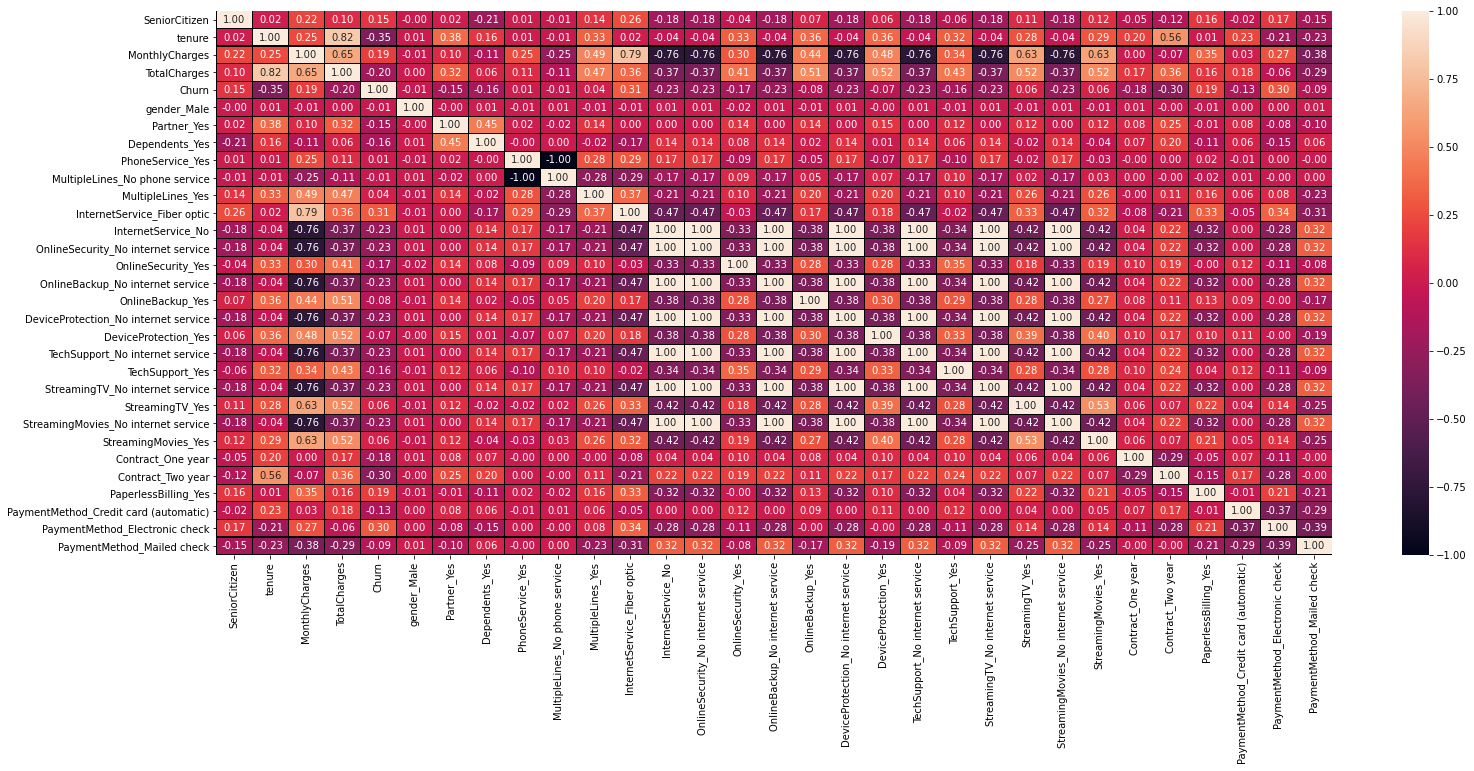

In [62]:
# Correlation matrix
plt.figure(figsize = (25,10))
sns.heatmap(customer_dum.corr(),annot = True,linewidth=0.1,linecolor='black',fmt='0.2f')
plt.show()

In [70]:
customer_dum.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [71]:
x = customer_dum
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [72]:
 y = customer['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [73]:
#DataScaling 
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x = mms.fit_transform(x)
x.shape

(7043, 30)

### Building model 

In [80]:
#traing the model
from sklearn.model_selection import train_test_split,GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

maxAccu =0
maxRs =0
for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =.20,random_state=i)
    lr = LogisticRegression()  
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu :
        maxAccu =acc
        maxRs =i
print("Best accuracy is:",maxAccu,"On Random state:",maxRs)

pred_lr=lr.predict(x_test)
print("\nAccuracy",accuracy_score(y_test,pred_lr)*100)
print('\n',confusion_matrix(y_test,pred_lr))
print("\nClassification Report:\n",classification_report(y_test,pred_lr))
print("")


Best accuracy is: 0.8232789212207239 On Random state: 14

Accuracy 80.0567778566359

 [[919 104]
 [177 209]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1023
           1       0.67      0.54      0.60       386

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409




In [78]:
#cross_validation for LogisticRegression
from sklearn.model_selection import cross_val_score

crv = cross_val_score(lr,x,y,cv=10)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.8029247259832365


In [81]:
#Tunning the parameter using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.25,random_state=14)

clf = RandomForestClassifier()

params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
grd = GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params= >',grd.best_params_)

#RandomForest Classifier

clf = grd.best_estimator_

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print("\n Accuracy RandomForest Normal===>",accuracy_score(y_test,y_pred))
print("\n Confusion_mat:",'\n',rf_conf_mat)
print('\n')
report =classification_report(y_test,y_pred)
print(report)

best_params= > {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 15}

 Accuracy RandomForest Normal===> 0.7995457126632595

 Confusion_mat: 
 [[3487  412]
 [ 647  737]]


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3899
           1       0.64      0.53      0.58      1384

    accuracy                           0.80      5283
   macro avg       0.74      0.71      0.73      5283
weighted avg       0.79      0.80      0.79      5283



In [82]:
#cross_validation for RandomForest
from sklearn.model_selection import cross_val_score

crv = cross_val_score(clf,x,y,cv=10)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.7996536508704062


In [83]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('\n',confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 72.7427597955707

 [[3096  803]
 [ 637  747]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3899
           1       0.48      0.54      0.51      1384

    accuracy                           0.73      5283
   macro avg       0.66      0.67      0.66      5283
weighted avg       0.74      0.73      0.73      5283



In [84]:
#cross_validation for DecisionTree

crv = cross_val_score(dt,x,y,cv=10)
print("Cross validation score of DecisionTree Model",crv.mean())

Cross validation score of DecisionTree Model 0.7293741940683429


In [85]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_svc)*100)
print("\n",confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))


Accuracy 79.3677834563695

 [[3478  421]
 [ 669  715]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3899
           1       0.63      0.52      0.57      1384

    accuracy                           0.79      5283
   macro avg       0.73      0.70      0.72      5283
weighted avg       0.78      0.79      0.79      5283



In [87]:
#cross_validation for DecisionTree

crv = cross_val_score(svc,x,y,cv=10)
print("Cross validation score of SVC Model",crv.mean())

Cross validation score of SVC Model 0.7993745970341715


# From the model building i observed one thing that Accuracy score and CV score are
#### For LogisticRegression Accuracyscore is : 82% and CV Score:80%
#### for RandomForest Accuracyscore is : 79.9% and CV Score:79.9%
#### For Decision Tree Accuracyscore is : 73.7% and CV Score:73.9%
#### For SVC Accuracyscore is : 79% ans CV Score:79.9%
### So,from the result RandomForestClassifier and SVC model giving the best results


In [90]:
#AUC_ROC_CURve
pred_prob_lr = lr.predict_proba(x_test)
pred_prob_dt = dt.predict_proba(x_test)
pred_prob_clf= clf.predict_proba(x_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, pred_prob_clf[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score_lr = roc_auc_score(y_test, pred_prob_lr[:,1])
auc_score_dt = roc_auc_score(y_test, pred_prob_dt[:,1])
auc_score_clf = roc_auc_score(y_test, pred_prob_clf[:,1])


print("AUC_score for linearRegression :",auc_score_lr, "\n AUC_score for DecisionTree Classifier:",auc_score_dt,
      "\n AUC_score for RandomForestClassifier:",auc_score_clf)

AUC_score for linearRegression : 0.844244003575839 
 AUC_score for DecisionTree Classifier: 0.6670636423745825 
 AUC_score for RandomForestClassifier: 0.8315444563375521


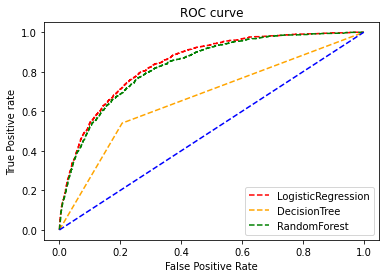

In [91]:
# plot roc curves
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='red', label='LogisticRegression')
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', label='DecisionTree')
plt.plot(fpr_clf, tpr_clf, linestyle='--',color='green', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

#### From the curve im observe that logisticRegression and Randomforest are almost same. 

In [92]:
#saving the model
import joblib
joblib.dump(clf,"customer_churn.pkl")

['customer_churn.pkl']